In [ ]:
import pandas as pd

files    = ['data/benin_clean.csv',
            'data/sierraleone_clean.csv',
            'data/togo_clean.csv']
countries = ['Benin', 'sierraleone_clean', 'togo']

dfs = []
for path, name in zip(files, countries):
    df = pd.read_csv(path)
    df['Country'] = name
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)


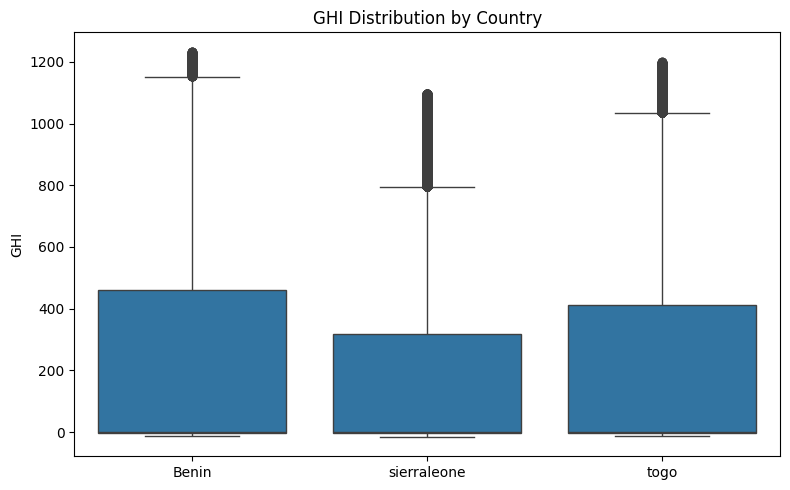

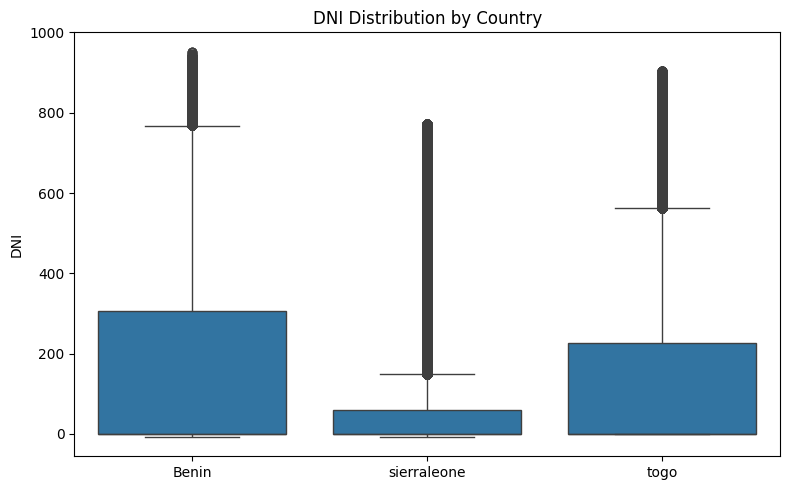

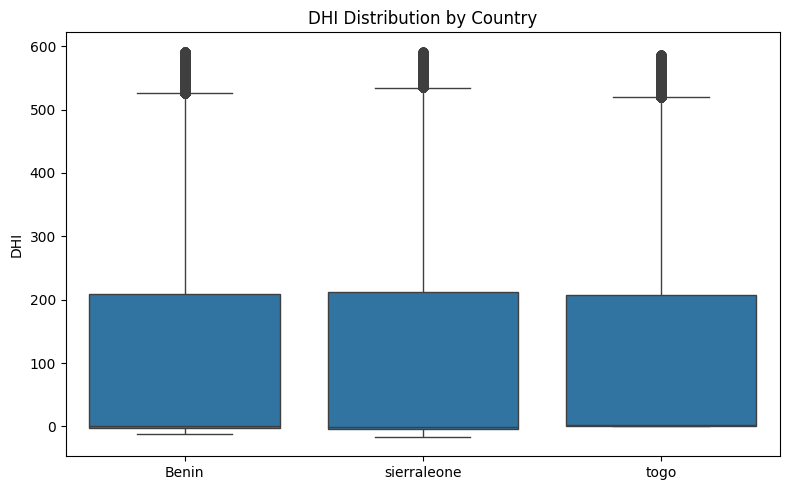

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['GHI', 'DNI', 'DHI']
for m in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=m, data=df_all)
    plt.title(f'{m} Distribution by Country')
    plt.xlabel('')
    plt.ylabel(m)
    plt.tight_layout()
    plt.show()


In [3]:
summary = (
    df_all
      .groupby('Country')[metrics]
      .agg(['mean','median','std'])
      .round(2)
)
print(summary)


                GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        232.77    0.7  327.10  164.44   -0.1  260.92  110.02    0.5   
sierraleone  179.25   -0.4  276.53  100.90   -0.1  198.64  104.73   -0.6   
togo         219.93    0.5  315.87  145.37    0.0  246.26  110.82    1.5   

                     
                std  
Country              
Benin        152.56  
sierraleone  152.46  
togo         150.94  


In [ ]:
from scipy.stats import f_oneway, kruskal

# extract GHI arrays per country
groups = [df_all[df_all['Country']==c]['GHI'] for c in countries]

# parametric ANOVA
f_stat, p_val = f_oneway(*groups)
print(f'ANOVA on GHI F={f_stat:.2f}, p={p_val:.3e}')

# non-parametric fallback
h_stat, p_kw   = kruskal(*groups)
print(f'Kruskal–Wallis on GHI  H={h_stat:.2f}, p={p_kw:.3e}')


ANOVA on GHI → F=4345.01, p=0.000e+00
Kruskal–Wallis on GHI → H=6370.42, p=0.000e+00


## Key Observations

- **Benin** has the highest average GHI (≈ 230 W/m²) and median, with the largest spread—day-to-day irradiance there is both higher and more variable.  
- **Togo** sits second in average GHI (≈ 220 W/m²) and shows a wide tail of very high values, indicating occasional peak-sun days comparable to Benin.  
- **Sierra Leone** records the lowest average GHI (≈ 180 W/m²) and a tighter box, suggesting more consistent but generally lower solar levels.  
- **DNI**: Sierra Leone’s direct normal irradiance is clustered at much lower values, whereas Benin and Togo reach substantially higher medians and maxima.  
- **DHI**: All three countries share similar median diffuse irradiance (~ 200 W/m²), but Benin and Togo exhibit slightly heavier upper tails, indicating more frequent high-diffuse days.  

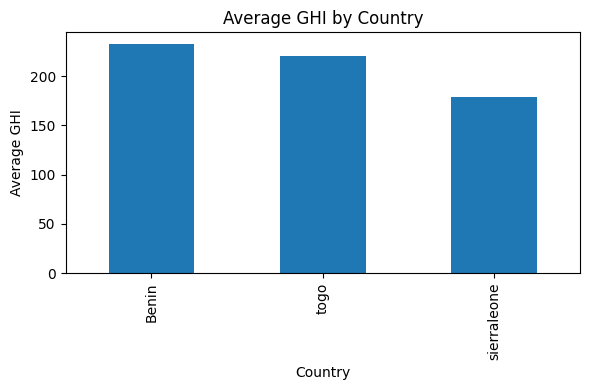

In [5]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
avg_ghi.plot(kind='bar')
plt.ylabel('Average GHI')
plt.title('Average GHI by Country')
plt.tight_layout()
plt.show()
